## 데이터 전처리, EDA 수행하기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
review = pd.read_csv('review_data.csv')
review

,title,price,review_counts,published_date,favorites
0,Apple 에어팟 프로 2세대 (MQD83KH/A),303000,7836,2022.09.,839
1,Apple 에어팟 3세대 맥세이프 충전 케이스 모델 (MME73KH/A),241710,12178,2021.10.,1512
2,Apple 에어팟 프로 1세대 2021년형 맥세이프 호환 (MLWK3KH/A),254940,10341,2021.10.,1609
3,애플 에어팟 프로 2세대 에어팟프로2 국내정품 MQD83KH/A 당일배송,331900,527,2022.10.,438
4,해외Apple 에어팟 프로 2세대 (MQD83KH/A),205000,688,2022.09.,387
...,...,...,...,...,...
195,애플 에어팟 2세대 with 충전 케이스 A2032 A2031 A1602 + Ali...,267400,0,2022.12.,0
196,해외애플 AirPods 2세대 왼쪽-A2031(L) 교체단품 호환 새품,58340,0,2022.11.,1
197,해외애플 파워비츠 프로 Powerbeats Pro 무선이어폰 익스트림블루투스이어폰,276000,0,2022.10.,0
198,애플 Airpods 2 에어팟2세대 MV7N2KH/A 유선충전,231100,0,2022.12.,0


In [35]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           200 non-null    object
 1   price           200 non-null    int64 
 2   review_counts   200 non-null    int64 
 3   published_date  200 non-null    object
 4   favorites       200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [36]:
review['published_date'] = pd.to_datetime(review['published_date']+'01')
review

,title,price,review_counts,published_date,favorites
0,Apple 에어팟 프로 2세대 (MQD83KH/A),303000,7836,2022-09-01,839
1,Apple 에어팟 3세대 맥세이프 충전 케이스 모델 (MME73KH/A),241710,12178,2021-10-01,1512
2,Apple 에어팟 프로 1세대 2021년형 맥세이프 호환 (MLWK3KH/A),254940,10341,2021-10-01,1609
3,애플 에어팟 프로 2세대 에어팟프로2 국내정품 MQD83KH/A 당일배송,331900,527,2022-10-01,438
4,해외Apple 에어팟 프로 2세대 (MQD83KH/A),205000,688,2022-09-01,387
...,...,...,...,...,...
195,애플 에어팟 2세대 with 충전 케이스 A2032 A2031 A1602 + Ali...,267400,0,2022-12-01,0
196,해외애플 AirPods 2세대 왼쪽-A2031(L) 교체단품 호환 새품,58340,0,2022-11-01,1
197,해외애플 파워비츠 프로 Powerbeats Pro 무선이어폰 익스트림블루투스이어폰,276000,0,2022-10-01,0
198,애플 Airpods 2 에어팟2세대 MV7N2KH/A 유선충전,231100,0,2022-12-01,0


In [37]:
# 제품명 분석
from collections import Counter

product_names = []
for row in review['title'].str.split().tolist():
    product_names += row
Counter(product_names).most_common(30)


[('에어팟', 163),
 ('애플', 81),
 ('2세대', 70),
 ('프로', 69),
 ('Apple', 61),
 ('단품', 58),
 ('정품', 44),
 ('한쪽', 36),
 ('이어폰', 36),
 ('오른쪽', 31),
 ('유닛', 30),
 ('왼쪽', 29),
 ('3세대', 28),
 ('해외애플', 28),
 ('본체', 24),
 ('맥세이프', 21),
 ('무선', 20),
 ('1세대', 19),
 ('AirPods', 19),
 ('구매', 16),
 ('충전', 15),
 ('호환', 15),
 ('블루투스', 15),
 ('Pro', 14),
 ('에어팟프로', 14),
 ('MV7N2KH/A', 14),
 ('해외Apple', 13),
 ('충전케이스', 13),
 ('한쪽구매', 13),
 ('모델', 11)]

<AxesSubplot: xlabel='price', ylabel='Count'>

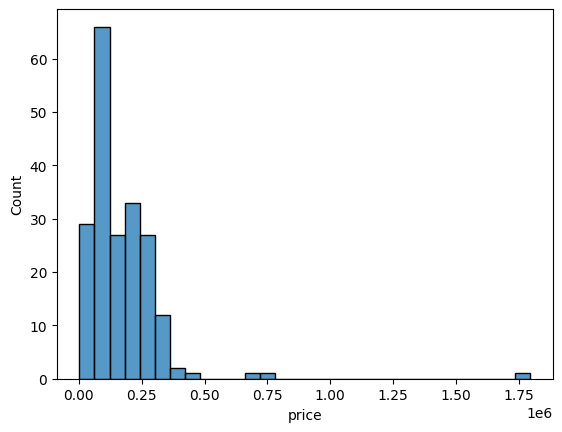

In [38]:
# 가격대 분포
sns.histplot(data=review, x="price", bins=30)

In [26]:
0.1e6

100000.0

<AxesSubplot: xlabel='published_date', ylabel='review_counts'>

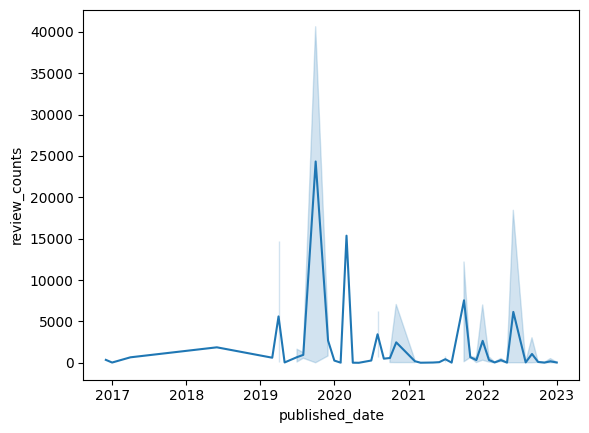

In [39]:
sns.lineplot(data=review, x="published_date", y="review_counts")

<AxesSubplot: xlabel='published_date', ylabel='favorites'>

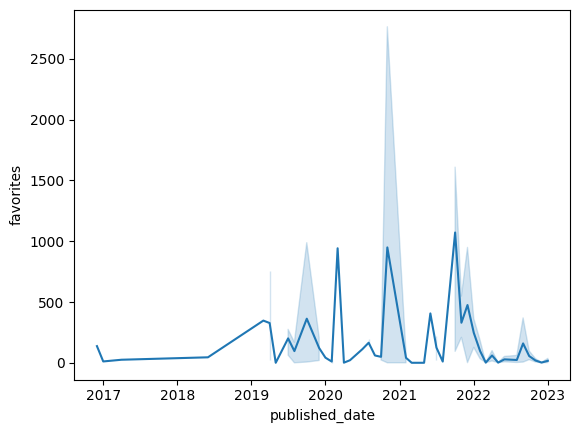

In [40]:
sns.lineplot(data=review, x="published_date", y="favorites")

<AxesSubplot: ylabel='review_counts'>

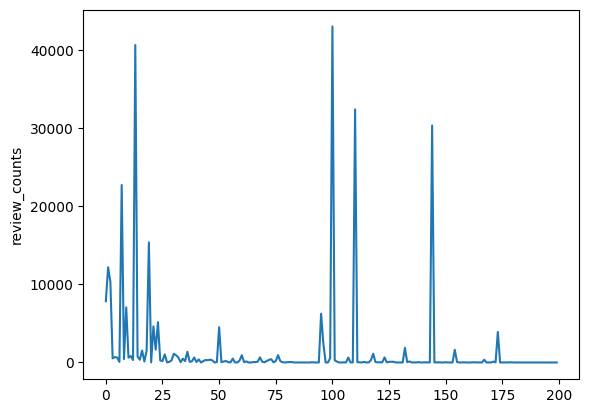

In [44]:
# 랭킹 순
sns.lineplot(x=review.index, y=review['review_counts'])

<AxesSubplot: ylabel='favorites'>

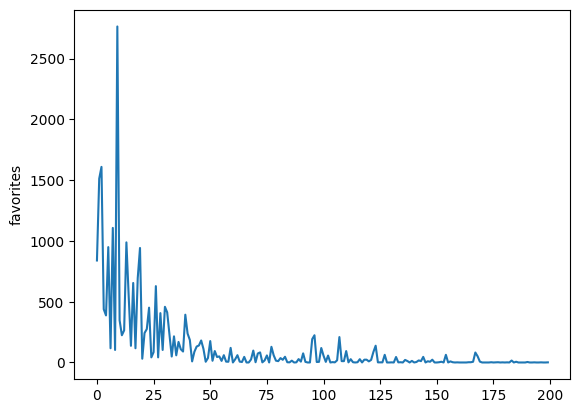

In [45]:
sns.lineplot(x=review.index, y=review['favorites'])

<AxesSubplot: ylabel='price'>

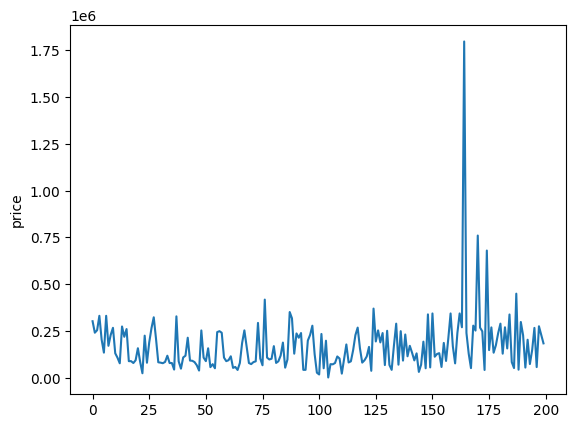

In [46]:
sns.lineplot(x=review.index, y=review['price'])

In [52]:
# 특정 키워드가 랭킹과 관련이 있는지
review[review['title'].str.contains('호환')]

,title,price,review_counts,published_date,favorites
2,Apple 에어팟 프로 1세대 2021년형 맥세이프 호환 (MLWK3KH/A),254940,10341,2021-10-01,1609
27,Apple 애플 에어팟프로 (MLWK3KH/A) 정품 3세대 맥세이프호환,323900,12,2022-09-01,42
48,Apple 에어팟 프로 1세대 2021년형 맥세이프 호환 (MLWK3KH/A),253790,0,2023-01-01,6
85,해외애플 AirPods 2세대 오른쪽-A2032(R) 교체단품 호환 새품,55180,0,2022-11-01,1
89,해외애플 에어팟 프로 1세대 맥세이프 호환 (MLWK3AM/A),129900,5,2020-02-01,28
94,해외애플 무결점 AirPods 1세대 왼쪽-A1722(L) 교체단품 호환,43610,2,2022-09-01,0
97,[Apple 정품] 에어팟 프로 1세대 맥세이프 호환 [MLWK3KH/A],279000,1,2022-11-01,4
99,블루투스 무선 이어폰 모음전 애플 아이폰 삼성 갤럭시 LG 호환 차이팟 에어 프로 ...,28500,549,2019-08-01,119
116,Apple 애플 에어팟 프로 블루투스 이어폰 맥세이프 호환 Airpods Pro-(...,229000,5,2022-06-01,27
135,해외애플 AirPods Pro 왼쪽(L)-A2084 호환단품 이어폰교체 새품,71200,2,2022-12-01,0
